In [1]:
import pandas as pd

df = pd.read_csv("questionnaire_answers.csv")

In [2]:
if "Časová značka" in df:
    df = df.drop(columns=["Časová značka"])

# Emojis

In [3]:
import re

emojis = df.filter(regex=("Please choose .*"))
emojis = emojis.rename(columns={element: re.sub(r'.*\[(.+)\]',r'\1', element) for element in emojis.columns.tolist()})
emojis[emojis.columns] = emojis[emojis.columns].astype("string")
# emojis.info()

In [4]:
accurate = (df.values == "Accurate").sum()
mildly_accurate = (df.values == "Mildly accurate").sum()
not_accurate = (df.values == "Not accurate").sum()

In [5]:
total_answers_emojis = accurate + mildly_accurate + not_accurate
rows_emojis = len(emojis)

assert(total_answers_emojis % rows_emojis == 0)

In [6]:
print(f"Accurate: {accurate / total_answers_emojis * 100:.02f} %")
print(f"Mildly accurate: {mildly_accurate / total_answers_emojis * 100:.02f} %")
print(f"Not accurate: {not_accurate / total_answers_emojis * 100:.02f} %")

Accurate: 20.82 %
Mildly accurate: 25.36 %
Not accurate: 53.83 %


## Graph

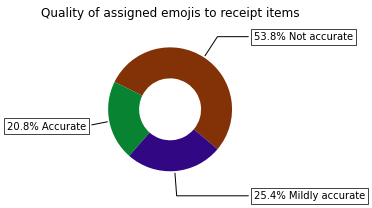

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sizes = [not_accurate, accurate, mildly_accurate]
total = sum(sizes)

labels = [
    f'{sizes[0]/total*100:.1f}% Not accurate', 
    f'{sizes[1]/total*100:.1f}% Accurate',
    f'{sizes[2]/total*100:.1f}% Mildly accurate',
]

colors = ['#833107', '#078331', '#310783']


wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Quality of assigned emojis to receipt items",pad=15)

plt.tight_layout()
plt.savefig("quality_of_emojis.pdf")

# Images

In [8]:
images = df.filter(regex=("Which image .*"))
images[images.columns] = images[images.columns].astype("string")
# images.info()

/Users/petr.janik/opt/anaconda3/envs/ib031/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [9]:
left = (df.values == "Left").sum()
right = (df.values == "Right").sum()

not_accurate = (df.values == "Not accurate").sum()

In [10]:
total_answers_images = left + right
rows_images = len(images)

assert(total_answers_images % rows_images == 0)

## Graph

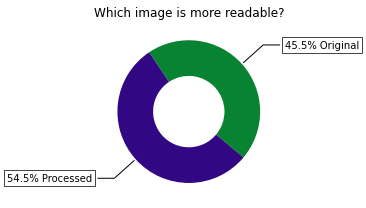

In [11]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

sizes = [left, right]
total = sum(sizes)

labels = [
    f'{sizes[0]/total*100:.1f}% Original', 
    f'{sizes[1]/total*100:.1f}% Processed',
]

colors = ['#078331', '#310783']


wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Which image is more readable?")

plt.tight_layout()
plt.savefig("which_image_is_more_readable.pdf")